# Ahmed Nabil Ibrahim Awaad

## Objective:  
> In This Assignment, You Will Apply the Simple linear regression algorithm to predict city-cycle fuel consumption in miles per gallon(mpg) in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# Models
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

%matplotlib inline

### 1- Load the data from the file (`auto-mpg.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

In [6]:
# load the data
mpg_df = pd.read_csv('data/auto-mpg.data',
                     delim_whitespace=True,
                     header=None,
                     names= ['mpg', 'cylinders', 'displacement',
                             'horsepower', 'weight', 'acceleration',
                             'model year', 'origin', 'car_name'])


### 2- Data inspection. Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data. Use any necessary visualization techniques to inspect your data

In [7]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
# lets convert horsepower from object to float64

In [10]:
mpg_df.horsepower.unique()
# NaN == '?'

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [11]:
mpg_df.horsepower = pd.to_numeric(mpg_df.horsepower, errors='coerce')

In [12]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [13]:
mpg_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car_name        0
dtype: int64

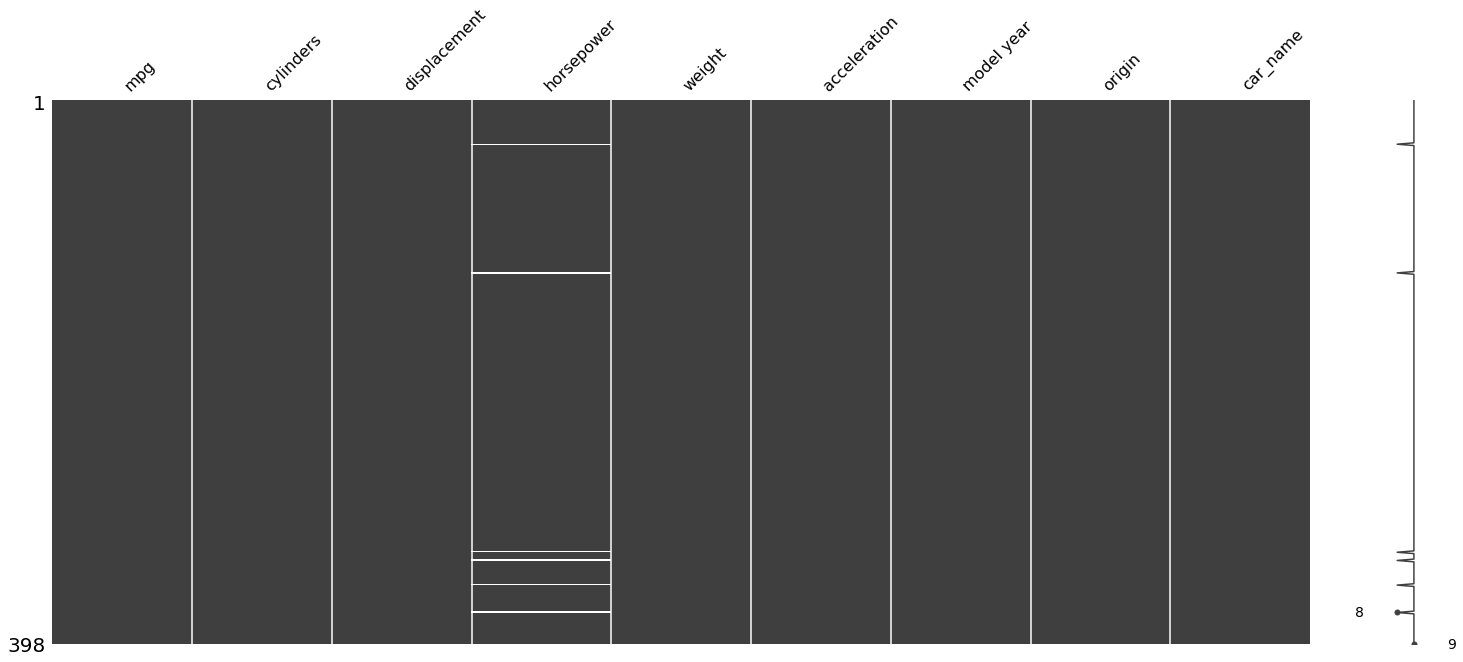

In [14]:
import missingno as msno
msno.matrix(mpg_df);
plt.show()

In [15]:
# number of na in  horsepower is small ---> so we can drop it
mpg_df.dropna(inplace=True)

In [16]:
# Check duplicated
mpg_df.duplicated().sum()

0

In [17]:
mpg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


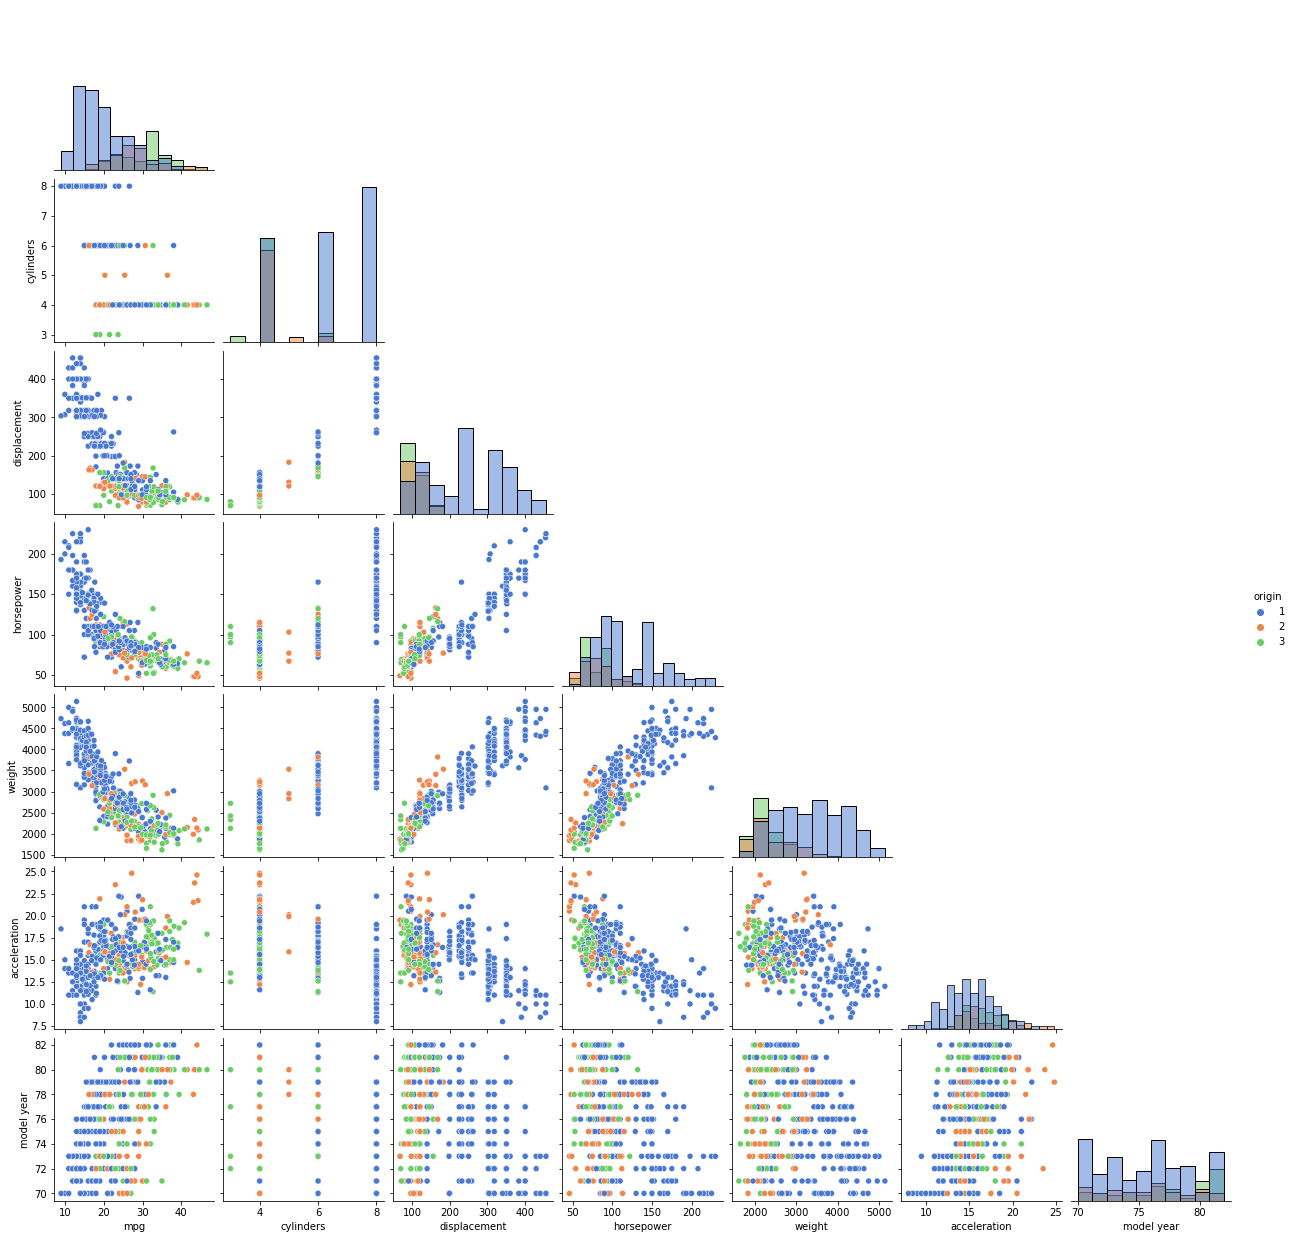

In [18]:
sns.pairplot(mpg_df, hue='origin', corner=True, diag_kind='hist', palette='muted');
plt.show()

In [19]:
origin_data = mpg_df.origin.value_counts().sort_index()
origin_data

1    245
2     68
3     79
Name: origin, dtype: int64

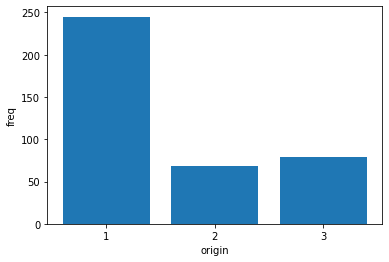

In [20]:
plt.bar(x=origin_data.index, height=origin_data)
plt.xlabel('origin')
plt.ylabel('freq')
plt.xticks([1,2,3])
plt.show()

In [21]:
# origin is unbalanced data

In [22]:
cylinders_data = mpg_df.cylinders.value_counts().sort_index()
cylinders_data

3      4
4    199
5      3
6     83
8    103
Name: cylinders, dtype: int64

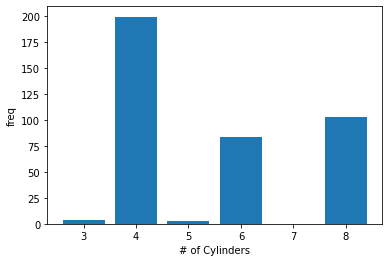

In [23]:
plt.bar(x=cylinders_data.index, height=cylinders_data)
plt.xlabel('# of Cylinders')
plt.ylabel('freq')
plt.xticks([3,4,5,6,7,8])
plt.show()

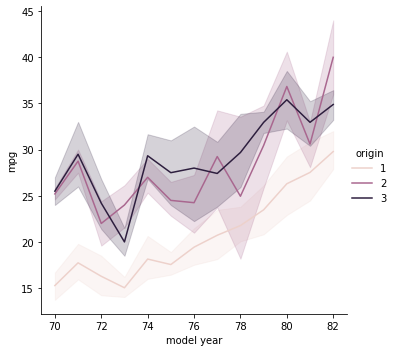

In [24]:
sns.relplot(x='model year', y='mpg', data=mpg_df, hue='origin', kind='line');

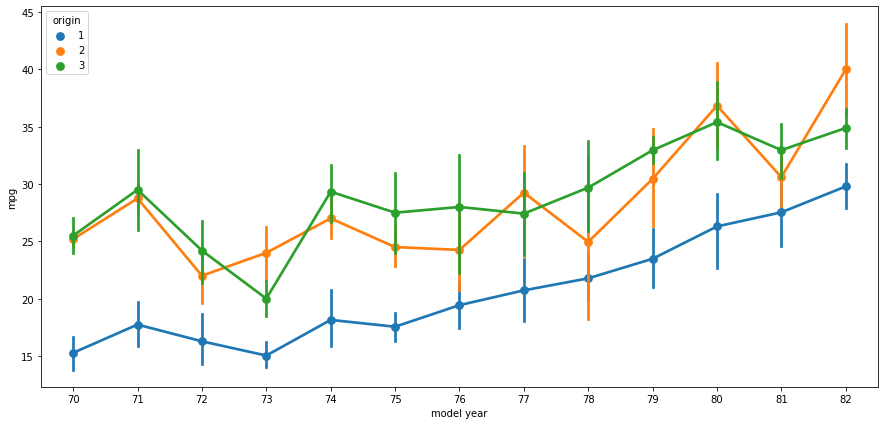

In [25]:
fig = plt.subplots(figsize=(15,7))
sns.pointplot(x='model year', y= 'mpg' , data=mpg_df, hue='origin');

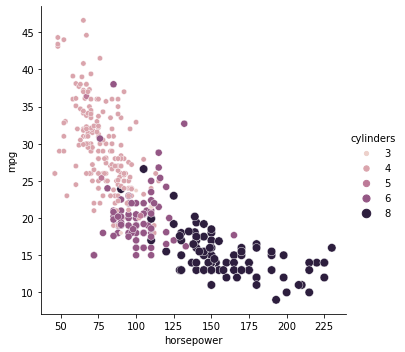

In [26]:
sns.relplot(x="horsepower", y="mpg", 
            data=mpg_df, kind="scatter",
            size="cylinders",
            hue='cylinders')
plt.show()

### 3- Prepare the data for regression. 
>Now you have to select the best 3 different independent variables to be used individually in your linear regression Model. Justify your reasoning

<AxesSubplot:>

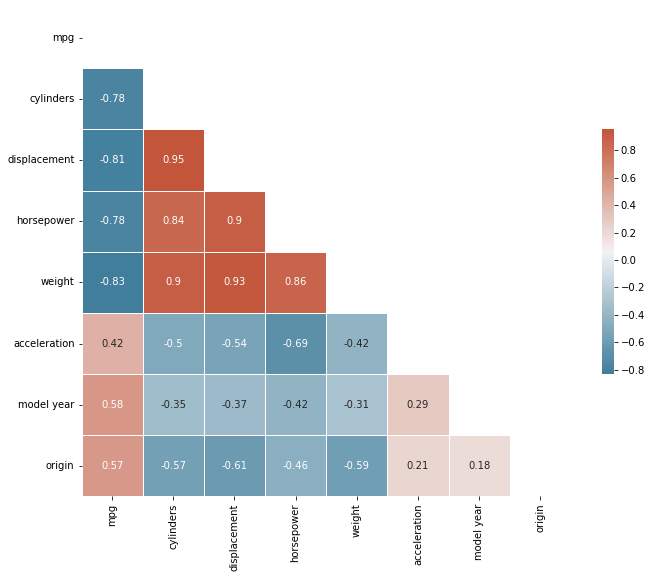

In [27]:
corr = mpg_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True)

In [28]:
corr_with_mpg = mpg_df.corr().mpg.drop('mpg').sort_values()
corr_with_mpg

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
Name: mpg, dtype: float64

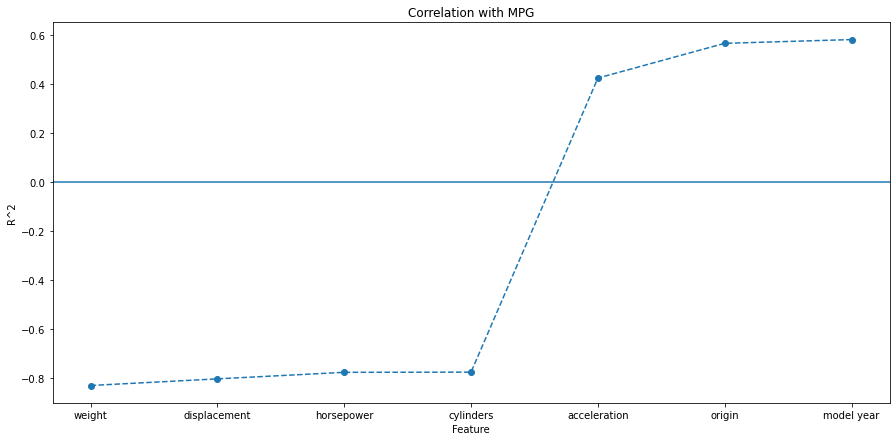

In [29]:
plt.subplots(figsize=(15,7))
plt.plot(corr_with_mpg, 'o--')
plt.axhline(y=0)
plt.xlabel('Feature')
plt.ylabel('R^2')
plt.title('Correlation with MPG')
plt.show()

In [30]:
# lets build model for mpg with every feature and get the R^2

print('{0:25} : {1:5}\n'.format('feature',  'Training_R^2_Score') )

for feature in mpg_df.drop(columns=['mpg','car_name']).columns:
    model = XGBRegressor().fit(mpg_df[[feature]], mpg_df.mpg)
    Training_Score = model.score(mpg_df[[feature]], mpg_df.mpg)
    
    print('{0:25} : {1:5}'.format(feature,  Training_Score) )

feature                   : Training_R^2_Score

cylinders                 : 0.641274232914884
displacement              : 0.815341553306598
horsepower                : 0.8025570048677556
weight                    : 0.9542052183781262
acceleration              : 0.5176751990198789
model year                : 0.42975354113624153
origin                    : 0.3318482389885983


In [31]:
# # I will take the top three correlation features with mpg
# - weight         -0.832244
# - displacement   -0.805127
# - horsepower     -0.778427

# and top R^2 score
# displacement              : 0.815341553306598
# horsepower                : 0.8025570048677556
# weight                    : 0.9542052183781262

### 4-Using the pandas operators to prepare the feature variables `X` and the response `Y` for the fit. Note that `sklearn` expects data as arrays, so convert extracted columns into arrays. Split the data into `train` and `test` using `sklearn` `train_test_split` function.

In [32]:
from sklearn.model_selection import train_test_split

features= ['weight',
            'displacement',
            'horsepower']

X= mpg_df[features]
y= mpg_df.mpg

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
X_train.head()

,weight,displacement,horsepower
267,2560.0,134.0,95.0
16,2774.0,199.0,97.0
67,4633.0,429.0,208.0
160,3907.0,231.0,110.0
7,4312.0,440.0,215.0


In [34]:
y_train.head()

267    27.5
16     18.0
67     11.0
160    17.0
7      14.0
Name: mpg, dtype: float64

### 5- Use the different regression learning models to predict the mpg values for the test dataset, run prediction on `X` from test part. Show the R-squared score of the prediction. Use plots to visualize the results

In [35]:
models = {
            "LR"   : LinearRegression(),
            "KNNR" : KNeighborsRegressor(), 
            "SVR"  : SVR(),
            "DT"   : DecisionTreeRegressor(),
            "RF"   : RandomForestRegressor(),
            "XGBR": XGBRegressor()
}

In [36]:
results = []
for name, model in models.items():
    print('{0:25} : {1:5}'.format('Model name', name ) )
    
#     scores = cross_validation(train_df, model)
#     print('{0:25} : {1:5}'.format('R^2 cross-validation', np.mean(scores) ) )
    
    model.fit(X_train, y_train)
    Training_Score = model.score(X_train, y_train)
    Test_Score = model.score(X_test, y_test)
    

    print('{0:25} : {1:5}'.format('R^2 Training Score',  Training_Score) )
    print('{0:25} : {1:5}'.format('R^2 Test Score',  Test_Score) )
    
    print('-'*50 + '\n')
    
    temp ={'Name':name,'Training_Score':Training_Score, 'Test_Score':Test_Score}
    results.append(temp)

Model name                : LR   
R^2 Training Score        : 0.7150992490903942
R^2 Test Score            : 0.6599244793845138
--------------------------------------------------

Model name                : KNNR 
R^2 Training Score        : 0.7964802987479489
R^2 Test Score            : 0.6462694071456536
--------------------------------------------------

Model name                : SVR  
R^2 Training Score        : 0.7053184559152652
R^2 Test Score            : 0.7097735486299581
--------------------------------------------------

Model name                : DT   
R^2 Training Score        : 0.99880352446639
R^2 Test Score            : 0.47539325172055535
--------------------------------------------------

Model name                : RF   
R^2 Training Score        : 0.9689013823765406
R^2 Test Score            : 0.6947336038640792
--------------------------------------------------

Model name                : XGBR 
R^2 Training Score        : 0.9982698940126183
R^2 Test Score      

In [37]:
results_df = pd.DataFrame(results)
results_df 

,Name,Training_Score,Test_Score
0,LR,0.715099,0.659924
1,KNNR,0.796480,0.646269
2,SVR,0.705318,0.709774
3,DT,0.998804,0.475393
4,RF,0.968901,0.694734
5,XGBR,0.998270,0.667467


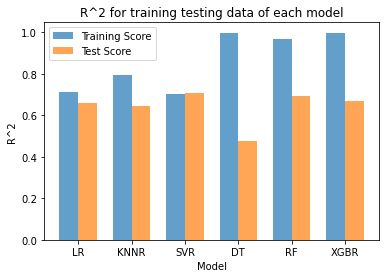

In [38]:
ind = np.arange(len(results_df['Name']))  # the x locations for the groups
width = 0.35       # the width of the bars

plt.bar(x=ind,
        height=results_df['Training_Score'],
        width=width,
        alpha=.7,
        label='Training Score')

plt.bar(x=ind+width,
        height=results_df['Test_Score'],
        width=width,
        alpha=.7,
        label='Test Score')

# title and labels
plt.ylabel('R^2')
plt.xlabel('Model')
plt.title('R^2 for training testing data of each model')
locations = ind + width / 2  # xtick locations
labels = results_df['Name']  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend()

### 6-Generate 5 random train/test splits to Fit the model and for each split and calculate the R-squared score for split then calculate the average R-squared score for the 5 runs. 

In [39]:
def random_train_test_splits(x, y, test_size, model, n, log=True):
    results = []
    for i in range(n):
        X_train, X_test, y_train, y_test, = train_test_split(x, y, test_size=test_size)
        model_ = model.fit(X_train, y_train)
        Training_Score = model_.score(X_train, y_train)
        Test_Score = model_.score(X_test, y_test)
        if log:
            print('{0:25} : {1:5}'.format('Iteration',  i+1) )
            print('{0:25} : {1:5}'.format('R^2 Training Score',  Training_Score) )
            print('{0:25} : {1:5}'.format('R^2 Test Score',  Test_Score) )
            print('-'*50 + '\n')

        temp ={'Iteration':i+1,'Training_Score':Training_Score, 'Test_Score':Test_Score}
        results.append(temp)
        
    return pd.DataFrame(results)
        

In [40]:
features= ['weight',
            'displacement',
            'horsepower']

X= mpg_df[features]
y= mpg_df.mpg

In [41]:
random_train_test_splits(X, y, test_size=0.25, model=XGBRegressor(), n=7, log=True)

Iteration                 :     1
R^2 Training Score        : 0.9994000124940182
R^2 Test Score            : 0.698912156115822
--------------------------------------------------

Iteration                 :     2
R^2 Training Score        : 0.9995958529844634
R^2 Test Score            : 0.6904870900826472
--------------------------------------------------

Iteration                 :     3
R^2 Training Score        : 0.9993563791558241
R^2 Test Score            : 0.6980604283044702
--------------------------------------------------

Iteration                 :     4
R^2 Training Score        : 0.9987212662007823
R^2 Test Score            : 0.7225560217407256
--------------------------------------------------

Iteration                 :     5
R^2 Training Score        : 0.999723213098134
R^2 Test Score            : 0.7271163942784515
--------------------------------------------------

Iteration                 :     6
R^2 Training Score        : 0.9984755387827672
R^2 Test Score       

,Iteration,Training_Score,Test_Score
0,1,0.999400,0.698912
1,2,0.999596,0.690487
2,3,0.999356,0.698060
3,4,0.998721,0.722556
4,5,0.999723,0.727116
5,6,0.998476,0.719775
6,7,0.998170,0.799313


In [42]:
scores_df = random_train_test_splits(X, y, test_size=0.25, model=XGBRegressor(), n=5, log=False)
scores_df

,Iteration,Training_Score,Test_Score
0,1,0.998729,0.677554
1,2,0.998575,0.660558
2,3,0.998494,0.756525
3,4,0.999347,0.787193
4,5,0.999334,0.779176


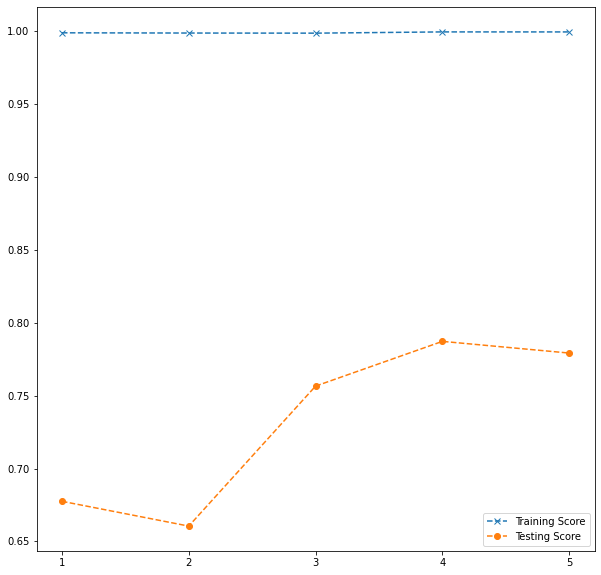

In [43]:
plt.subplots(figsize=(10,10))
plt.plot(scores_df.Iteration, scores_df.Training_Score,'x--',
         scores_df.Iteration, scores_df.Test_Score,'o--')
plt.legend(['Training Score', 'Testing Score'])
plt.xticks(scores_df.Iteration)
plt.show()

In [44]:
# getting the average R^2
scores_df.drop(columns='Iteration').mean()

Training_Score    0.998896
Test_Score        0.732201
dtype: float64

### 7- Does the test scores meet the expectations you had in step 3. What conclusion can you make based on the results?

In [45]:
# the score after combining the selected features for training dataset is higher than seperated features

### 8- Build your own linear regression Model based on Gradient Decent optimization technique for one on models in step 3. Find the R-squared score for your model

In [46]:
# Create a function to take x Matrix, y points, learning_rate(alpha) and max number of iterations() to get theta_vec
from sklearn.preprocessing import MinMaxScaler

def Linear_Regression_Batch_GD(features_matrix, y_vec, alpha=.01, iterations=1000, theta_vec=None):
    
    # prepare features_matrix
    
    
    if features_matrix.ndim == 1:
        features_matrix = features_matrix[:,np.newaxis]
        
    features_matrix = np.insert(features_matrix, 0 , np.ones(features_matrix.shape[0]), axis = 1)
    
    
    # initial parameters
    if theta_vec == None:
        theta_vec = np.zeros(features_matrix.shape[1])
    else:
        theta_vec = theta_vec
    
    # make temp lists Just for visualization
    cost_lst = []
    GD_list = []
    all_theta_vecs = []
    h_theta_lst =[]

    
    for _ in range(iterations):
        
        # appending theta vector to list
        all_theta_vecs.append(theta_vec)
        
        # Calculate the predicted output
        h_theta = features_matrix @ theta_vec
        h_theta_lst.append(h_theta)
        
        # Calculate loss
        error_vec = h_theta - y_vec
        cost = ((np.linalg.norm(error_vec)) ** 2) / y_vec.shape[0]
        cost_lst.append(cost)
        
        # Calculate gradient descent
        GD = np.array((1/y_vec.shape[0])*(features_matrix.T @ error_vec))
        GD_list.append(round(np.linalg.norm(GD),8))
        
        # Update theta vector
        theta_vec = theta_vec - alpha * GD
        
        
        # Stop conditions
#         if len(cost_lst) > 2:
#             # Check minimum gradient
#             if np.linalg.norm(GD) < 0.0000001 or np.linalg.norm(GD) > 1e100 :
#                 break
#             # Check cost
#             elif abs(cost_lst[-1] - cost_lst[-2]) < 0.000001 :
#                 break
#             # Check theta
#             elif abs(np.linalg.norm(theta_vec) - np.linalg.norm(all_theta_vecs[-1])) < 0.000001:
#                 break
        
    #return
    return theta_vec, cost_lst, GD_list, np.array(all_theta_vecs), h_theta_lst

In [47]:
# ploting function
def plot(theta_v, cost, GD_list , all_theta_vecs , alpha , title ="Title", size = (22,5)):
    fix,axes = plt.subplots(1,4,figsize=size)
    plt.suptitle(title,fontsize=20);
 #-----------------------------------------------------------------------#   
    axes[0].plot(np.arange(len(GD_list)),GD_list, label ="alpha = {}".format(alpha),
                             color='blue',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[0].set_xlabel("Number of iterations")
    axes[0].set_ylabel("Gradient")
    axes[0].legend()
#-----------------------------------------------------------------------#
    axes[1].plot(all_theta_vecs[:,0],cost, label ="alpha = {}".format(alpha),
                          color='red',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[1].set_xlabel("theta0")
    axes[1].set_ylabel("Loss")
    axes[1].legend()
#-----------------------------------------------------------------------#
    axes[2].plot(all_theta_vecs[:,1],cost, label ="alpha = {}".format(alpha),
                          color='red',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[2].set_xlabel("theta1")
    axes[2].set_ylabel("Loss")
    axes[2].legend()
#-----------------------------------------------------------------------#
    axes[3].plot(np.arange(len(cost)), cost, label ="alpha = {}".format(alpha),
                          color='g',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[3].set_xlabel("Number of iterations")
    axes[3].set_ylabel("Loss")
    axes[3].legend()

In [48]:
# ploting with function
from sklearn.metrics import r2_score
def plot_Batch_with_iter_alpha(x,y, iterations=1000, alpha=.001,title ="Title"):
    theta_v, cost, GD_list, all_theta_vecs, h_theta_lst=Linear_Regression_Batch_GD(
        x, y, alpha = alpha, iterations = iterations)
    plot(theta_v, cost, GD_list , all_theta_vecs , alpha , title = title, size = (22,5))
    y_pred = x*theta_v[1] + theta_v[0]
    r2 =r2_score(y,y_pred)
    print("R2 : ",r2)

In [49]:
X =mpg_df.weight.values
Y =mpg_df.mpg.values

(array([30., 89., 58., 52., 36., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

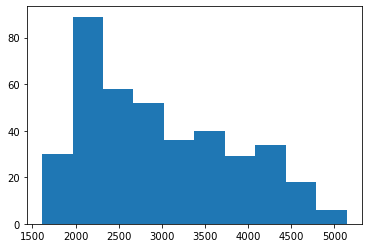

In [50]:
plt.hist(X)

(array([13., 78., 73., 58., 53., 48., 37., 22.,  4.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

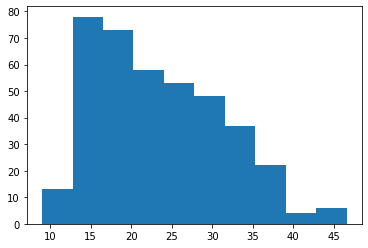

In [51]:
plt.hist(Y)

In [52]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X[:,np.newaxis])
X[:7]

array([[0.5361497 ],
       [0.58973632],
       [0.51686986],
       [0.51601928],
       [0.52055571],
       [0.77346187],
       [0.77714772]])

In [53]:
Y[:7]

array([18., 15., 18., 16., 17., 15., 14.])

In [54]:
theta_vec, cost_lst, GD_list, all_theta_vecs, h_theta_lst = Linear_Regression_Batch_GD(
                                                                                X,
                                                                                Y,
                                                                                iterations=10000,
                                                                                alpha=0.5,
                                                                                theta_vec=[0,0]
)

In [55]:
theta_vec

array([ 33.88136104, -26.97217712])

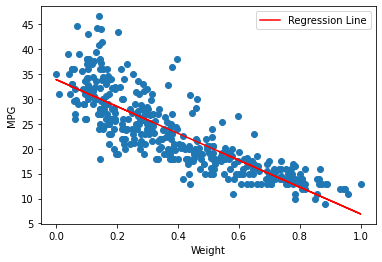

In [56]:

plt.scatter(X,Y);
plt.plot(X,X*theta_vec[1] + theta_vec[0], color ='red',label="Regression Line")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.legend();

R2 :  0.6925776043102099


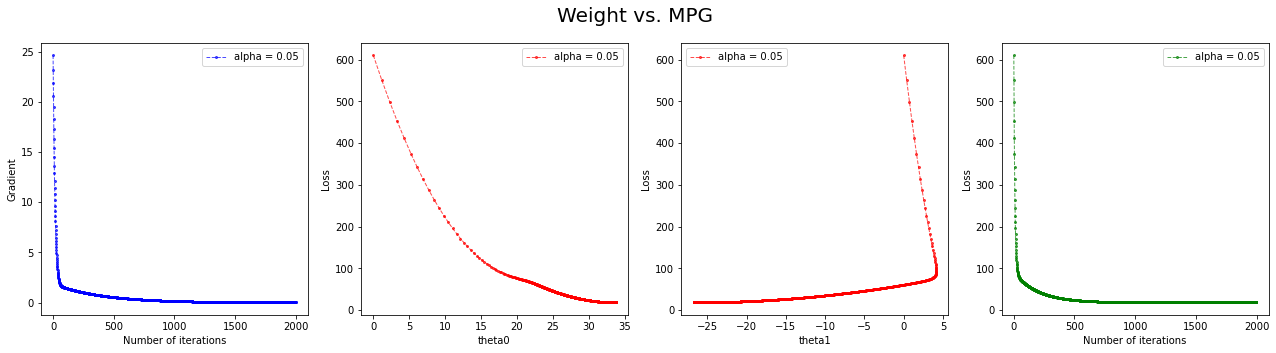

In [57]:
plot_Batch_with_iter_alpha(X,Y, iterations=2000,alpha=0.05, title="Weight vs. MPG")